In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [54]:

# Connect
conn = sqlite3.connect(r"C:\Users\91941\Downloads\inventory.db")


# Fetch data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
print(df.head())


   VendorNumber                VendorName  Brand              Description  \
0          1128         BROWN-FORMAN CORP   1233  Jack Daniels No 7 Black   
1          4425     MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035         PERNOD RICARD USA   8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC   4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC   3545          Ketel One Vodka   

   PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  \
0          26.27        36.99  1750.0                 145080   
1          23.19        28.99  1750.0                 164038   
2          18.24        24.99  1750.0                 187407   
3          16.17        22.99  1750.0                 201682   
4          21.89        29.99  1750.0                 138109   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60            142049.0       5.101920e+06   
1            3804041

# Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which one should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us to understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [44]:
#Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8565.0,10107.041331,17634.685420,2.000000e+00,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8565.0,17614.046468,12945.503736,5.800000e+01,5376.000000,17601.000000,24935.000000,9.063100e+04
PurchasePrice,8565.0,21.779365,81.185007,3.600000e-01,6.660000,10.060000,17.850000,3.352930e+03
ActualPrice,8565.0,32.295213,112.414374,4.900000e-01,9.990000,14.990000,25.990000,4.559990e+03
Volume,8565.0,864.406480,724.230365,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8565.0,3771.571395,12276.310633,1.000000e+00,42.000000,431.000000,2666.000000,3.376600e+05
TotalPurchaseDollars,8565.0,35883.087602,136715.560071,7.100000e-01,545.490000,5017.200000,26600.610000,3.811252e+06
TotalSalesQuantity,8565.0,3748.547577,12125.055208,1.000000e+00,62.000000,490.000000,2675.000000,3.349390e+05
TotalSalesDollars,8565.0,51536.284564,186061.452634,1.980000e+00,1349.850000,8482.220000,40613.050000,5.101920e+06
TotalSalesPrice,8565.0,22756.625624,49303.003032,9.900000e-01,584.610000,4549.650000,22595.120000,6.728193e+05


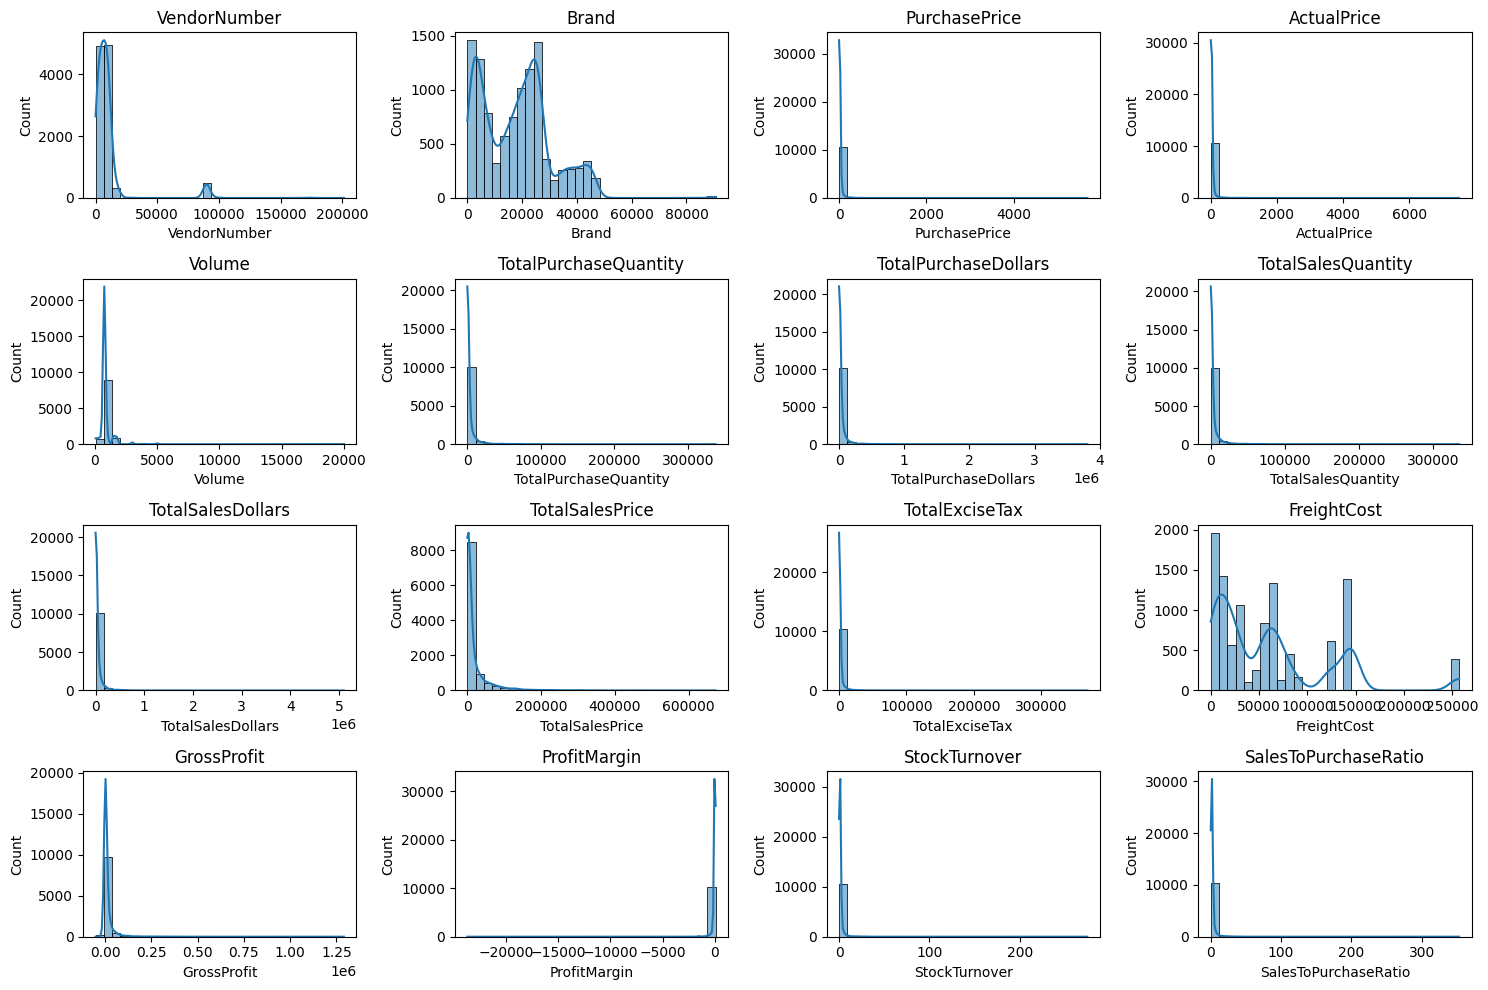

In [4]:
#Dsitribution Plots for numerical columns
numerical_columns=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

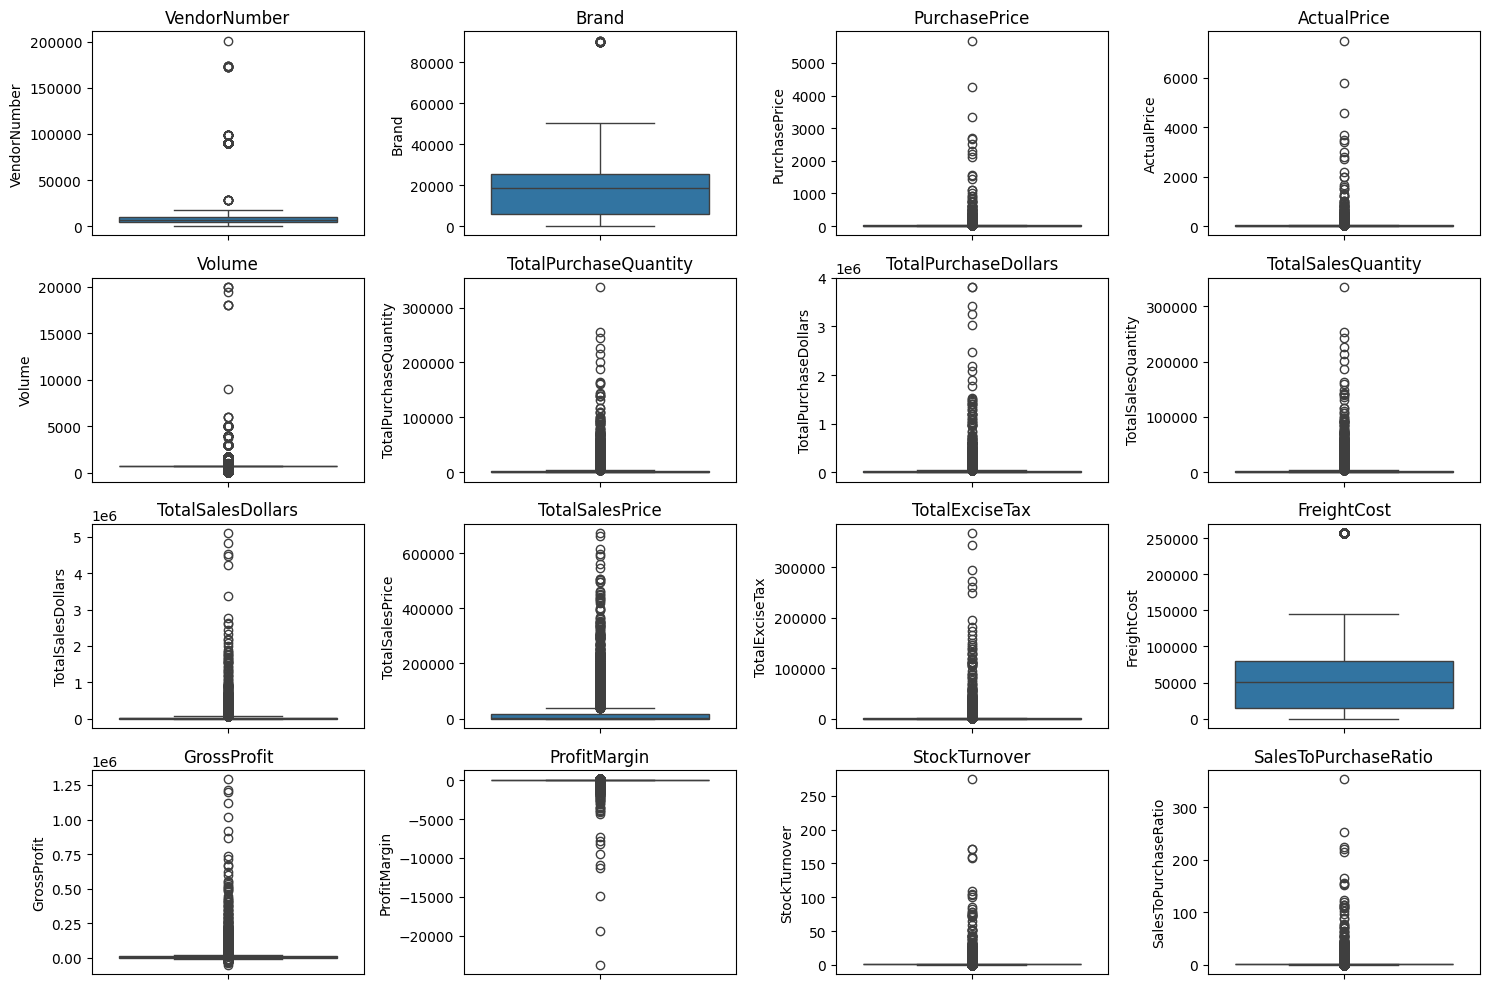

In [5]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics insight

## Negative and Zero value

- Gross Profit :- Minimum value is  -52,002.78, including losses. Some products or transactions may be selling at a loss due to high cost or selling at a discount lower than the purchase price.

- Profit Margin :- Has a minimum of minus infinity, which suggests cases where revenue is zero and even lower than the price. 

- Total Sales Quantity and Sales Dollar:- Minimum value are zero, meaning some products were purchased but never sold. This could be slow moving or absolute stock.

## Outliar indicated by High Standard Deviations:

- Purchase and Actual Price :- The max value is 5681.81 and 7499.99 are significantly higher than the mean 24.39 and 36.64, indicating potential premium products.

- Fright Cost :- Huge variation from 0.09 to 257032.07 suggests logistics inefficiencies and bulk shipment.

- Stock Turnover :- Range from 0 to 274.5 implying Some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that the sold quantity of the product is higher than the purchase quantity due to either sales or being fulfilled from other stocks.

In [6]:
#lets filter the data by removing inconsistancies
df=pd.read_sql_query("""select * from 
vendor_sales_summary
where GrossProfit>0
and ProfitMargin>0
and TotalSalesQuantity>0
""",conn)

In [7]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


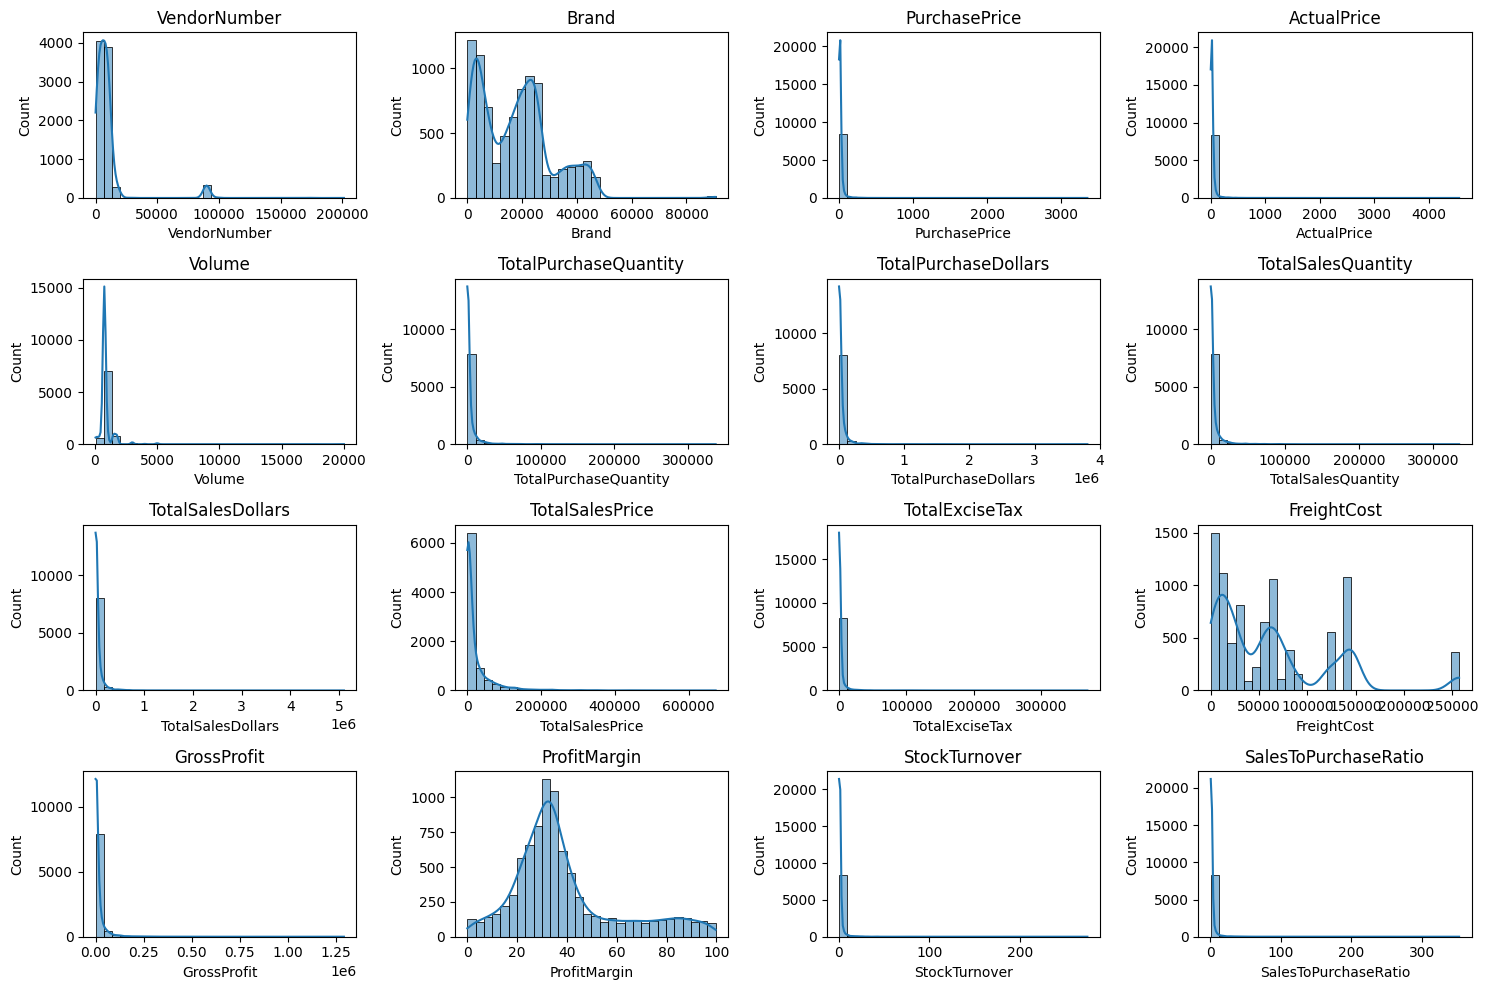

In [8]:
#Dsitribution Plots for numerical columns
numerical_columns=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

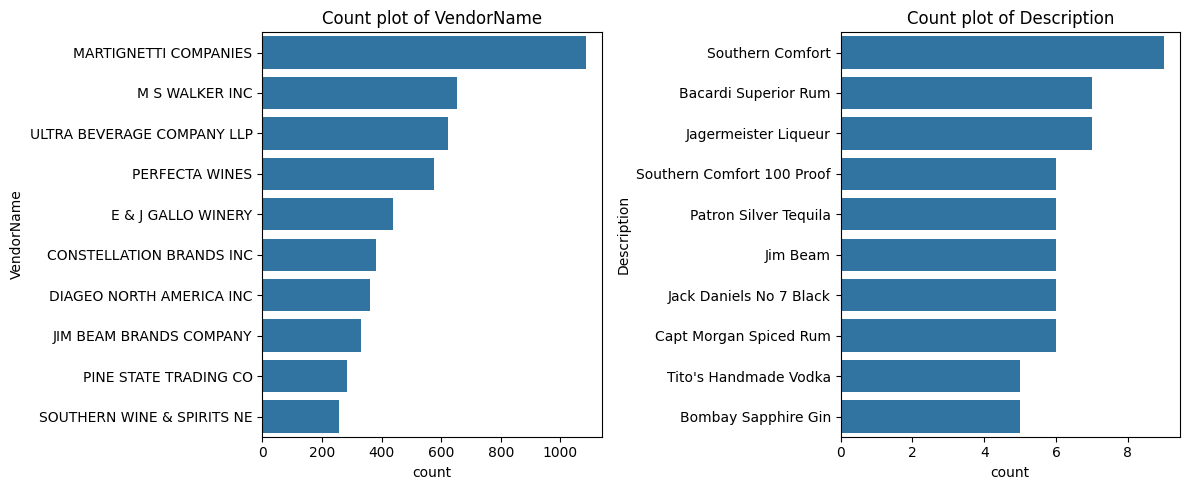

In [9]:
#Count plot for Categorical Columns
categorical_columns=['VendorName','Description']

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_columns):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])#Top 10 Categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

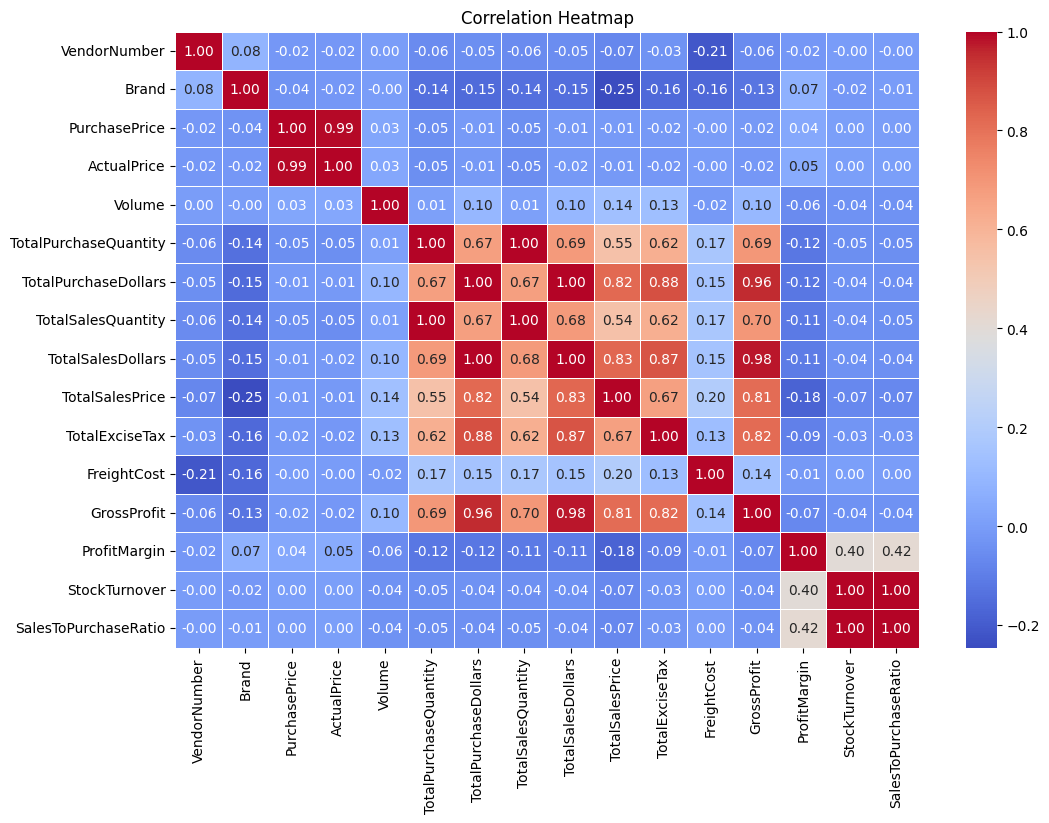

In [10]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_columns].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm',linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Insights
- PurchasePrice has weak correlation with TotalSalesDollar(-0.012) and the gross profit is (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between Total Purchase Quantity and Total Sales Quantity, 0.999, confirming efficient inventory turnover.
-  Negative correlation between Profit Margin and Total Sales Price, minus 0.179, suggests that as sale price increases, margin decreases, possibly due to competitive pricing pressures.
-  Stock turnover has weak negative correlation with both GrossProfit(-0.038) and Profit Margin(-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis
 ### Identify Brands that needs Promotional or Pricing Adjustment which exhibit Lower sales performance but higher profit margin.

In [11]:
brand_performance_data=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [12]:
brand_performance_data

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [13]:
low_sales_threshold=brand_performance_data['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance_data['ProfitMargin'].quantile(0.85)

In [14]:
low_sales_threshold

560.299

In [15]:
high_margin_threshold


64.97017552750111

In [16]:
target_brands=brand_performance_data[
(brand_performance_data['TotalSalesDollars']<=low_sales_threshold) &
(brand_performance_data['ProfitMargin']>=high_margin_threshold)
]
print('Brand with low sales but high profit margin')
display(target_brands.sort_values('TotalSalesDollars'))

Brand with low sales but high profit margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [17]:
brand_performance_data=brand_performance_data[brand_performance_data['TotalSalesDollars']<10000]# For Better Visualization

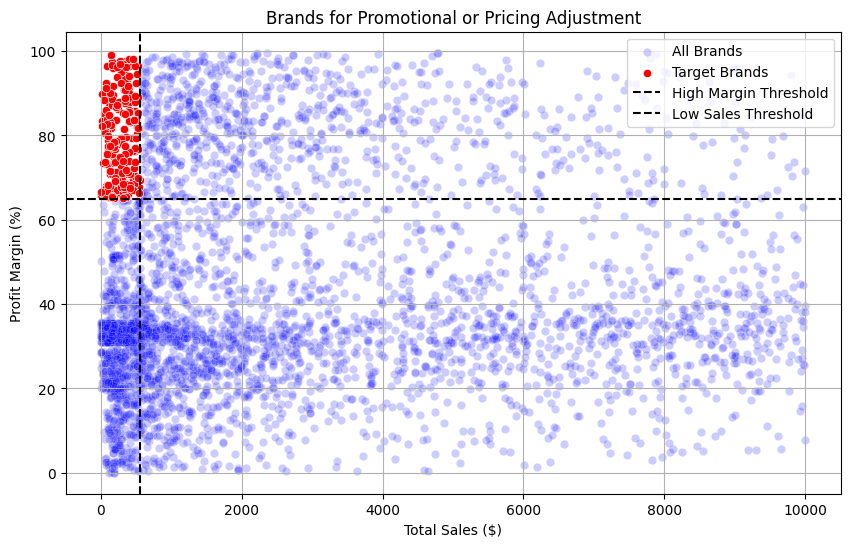

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance_data,x='TotalSalesDollars',y='ProfitMargin',color='blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color='red',label='Target Brands')

plt.axhline(high_margin_threshold,linestyle='--',color='black',label='High Margin Threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='black',label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustment')
plt.legend()
plt.grid(True)
plt.show()

### Which Vendor and brands demonstrate the highest sales performance?

In [19]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)
    

In [20]:
# Top Vendor Na Brands by sales Performance

top_vendor=df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brand=df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendor

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [21]:
top_brand

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brand.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

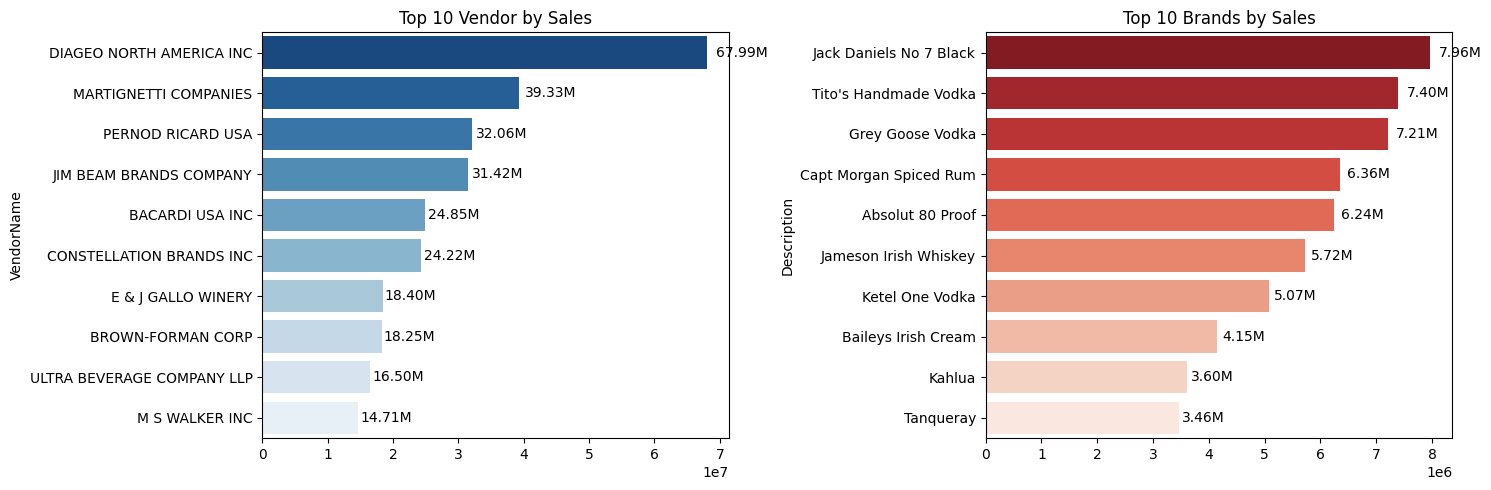

In [23]:
plt.figure(figsize=(15,5))

#Plot top vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendor.index,x=top_vendor.values,palette='Blues_r')
plt.title('Top 10 Vendor by Sales')


for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width()*0.02),
    bar.get_y()+bar.get_height()/2,
    format_dollars(bar.get_width()),
    ha='left',va='center',fontsize=10,color='black')

#plot for top brands

plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brand.index.astype(str),x=top_brand.values,palette='Reds_r')
plt.title('Top 10 Brands by Sales')


for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.02),
    bar.get_y()+bar.get_height()/2,
    format_dollars(bar.get_width()),
    ha='left',va='center',fontsize=10,color='black')

plt.tight_layout()
plt.show()

### Which Vendor Contributes the most to total Purchase Dolalrs?

In [24]:
vendor_performance=df.groupby("VendorName").agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [25]:
vendor_performance['PurchaseContribution']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [26]:
vendor_performance['PurchaseContribution']

0      0.000001
1      0.000084
2      0.000038
3      0.000003
4      0.000340
         ...   
114    0.000139
115    0.000971
116    0.019121
117    0.016932
118    0.000280
Name: PurchaseContribution, Length: 119, dtype: float64

In [27]:
vendor_performance['PurchaseContribution'] = (
    vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()
) * 100  # only this column is multiplied

vendor_performance = vendor_performance.sort_values('PurchaseContribution', ascending=False).round(2)


In [28]:
#Display Top 10 Vendors
top_vendors=vendor_performance.head(10)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [29]:
top_vendors['Cumulative_contribution']=top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,Cumulative_contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


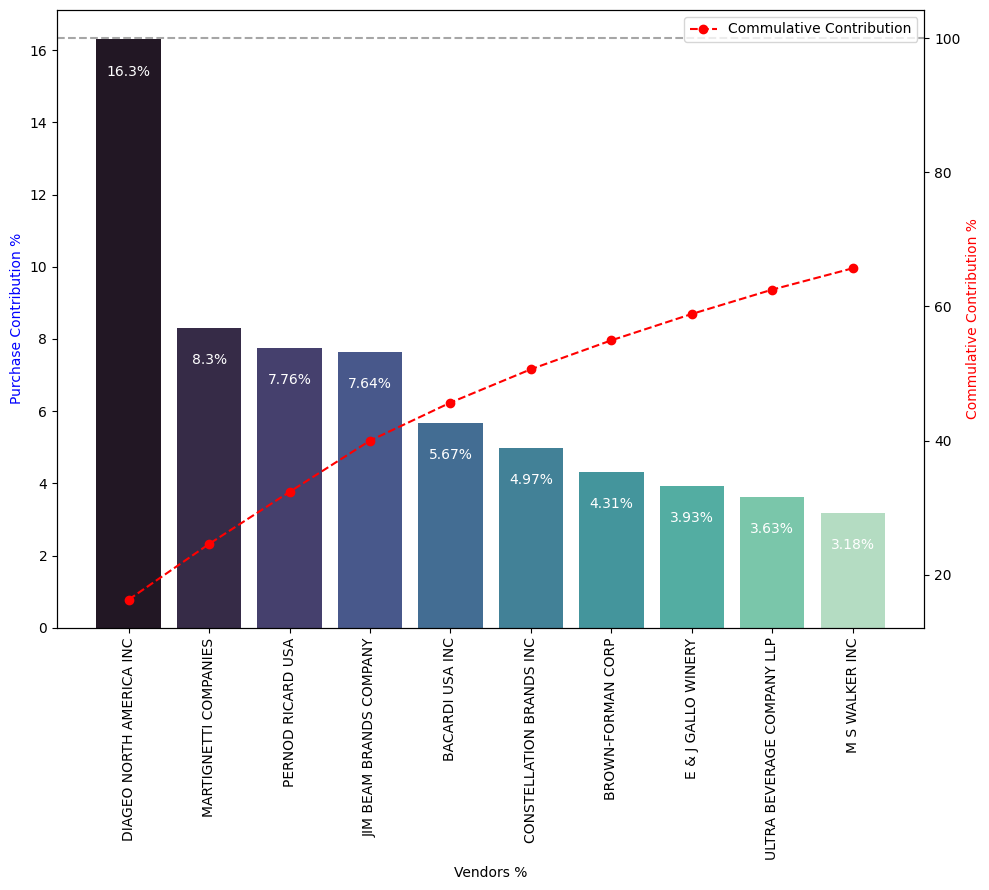

In [30]:
fig, ax1 = plt.subplots(figsize=(10,9))

#Bar Plot for purchase Contribution
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution'],palette='mako',ax=ax1)

for i,value in enumerate(top_vendors['PurchaseContribution']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='White')


#Line plot for commulative Contribution
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_contribution'],color='red',marker='o',linestyle='dashed',label='Commulative Contribution')

ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Commulative Contribution %',color='red')
ax1.set_xlabel('Vendors %')
ax2.set_xlabel('Pareto Chart: Vendor Contribution to Total Purchase')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

### How much of total procuremenet is dependent on the top vendors?

In [31]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution'].sum(),2)},%")

Total Purchase Contribution of top 10 vendors is 65.69,%


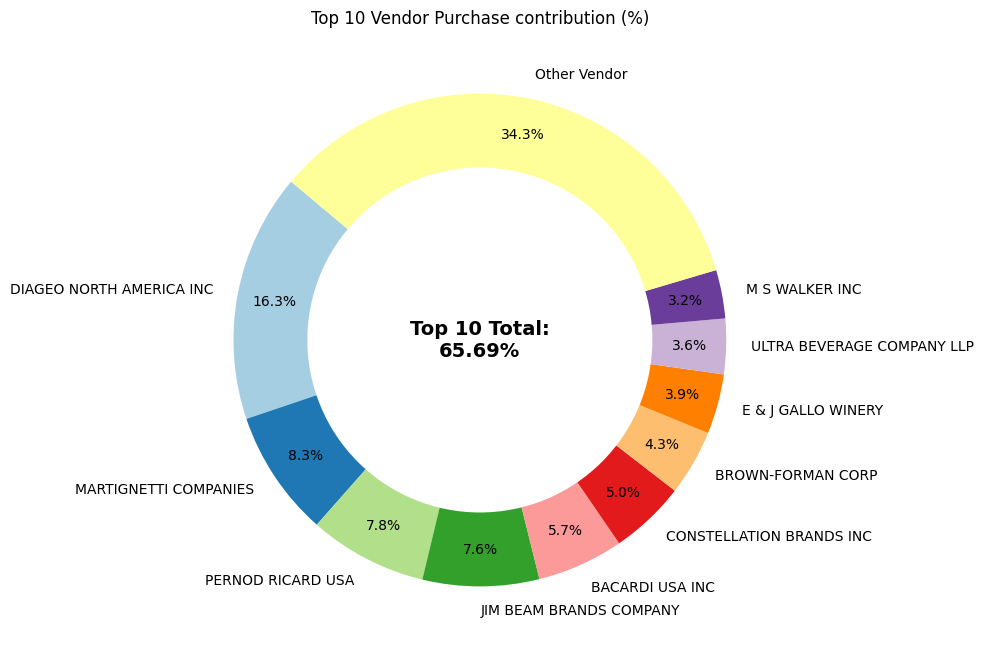

In [32]:
vendors=list(top_vendors['VendorName'].values)
purchase_contribution=list(top_vendors['PurchaseContribution'].values)
total_contribution=sum(purchase_contribution)
remaining_contribution=100-total_contribution

#Append "Other Vendor" Category
vendors.append("Other Vendor")
purchase_contribution.append(remaining_contribution)

#Donut Chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(purchase_contribution,labels=vendors,autopct='%1.1f%%',
                             startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

#Draw a white circle in teh centre to create Donut "Effect"
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

#Add Total Contribution Annotation in the centre
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendor Purchase contribution (%)")
plt.show()


### Does purchasung in bulk reduce the unit price and what is the optimal purchase volume for cost savings?

In [33]:
df['unitpurchaseprice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [34]:
df['Ordersize']=pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium','Large'])

In [35]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,unitpurchaseprice,Ordersize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small


In [36]:
df.groupby('Ordersize')[['unitpurchaseprice']].mean()

,unitpurchaseprice
Ordersize,
Small,39.057543
Medium,15.486414
Large,10.777625


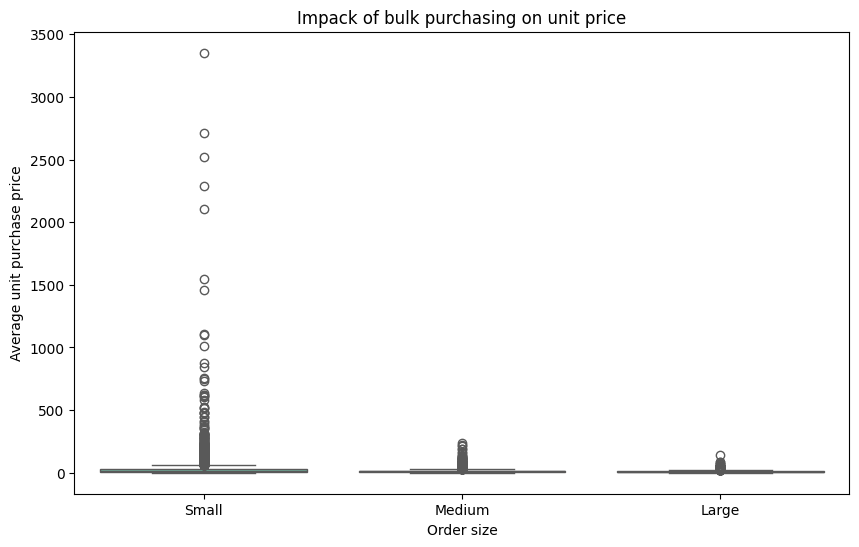

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Ordersize',y='unitpurchaseprice',palette='Set2')
plt.title('Impack of bulk purchasing on unit price')
plt.xlabel('Order size')
plt.ylabel('Average unit purchase price')
plt.show()

- Vendors buying in bulk large order size get the lowest unit price $10.78 per unit, meaning higher margin if they can manage inventory efficiently.
- the price difference between small and large orders is substantially 72% reductions in unit cost.
-  this suggests that the bulk pricing strategies successfully encourage vendors to purchase in large volumes, leading to higher overload sales despite slower per unit revenue.

### Which vendor have low inventory turnover, indicating excess stock and slow-moving products?

In [38]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### How much capital is locked in unsold inventory per vendor, and which vendor contributes the most to it?

In [39]:
df['unsoldinventoryvalue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total unsold Captital:',format_dollars(df['unsoldinventoryvalue'].sum()))

Total unsold Captital: 2.71M


In [48]:
# Aggregate capital locked per vendor
inventory_value_per_vendor=df.groupby('VendorName')['unsoldinventoryvalue'].sum().reset_index()

#Sort vendors with the highest Locked capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='unsoldinventoryvalue',ascending=False)
inventory_value_per_vendor['unsoldinventoryvalue']=inventory_value_per_vendor['unsoldinventoryvalue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,unsoldinventoryvalue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### What is the 95% confidence intervals for profit margins of top_performing and low_performing vendors

In [41]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)


In [46]:
top_vendors=df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [47]:
def confidence_interval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data)) #standard error
    t_critical=stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error=t_critical*std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error



Top vendors 95% CI: (30.74,31.61,Mean: 31.17)
Low vendors 95% CI: (40.48,42.62,Mean: 41.55)


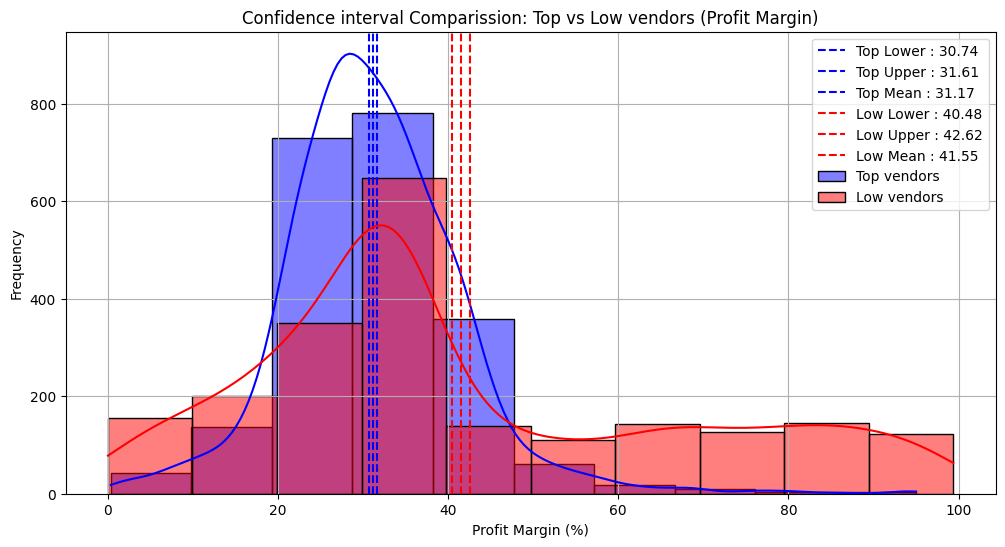

In [59]:
top_mean,top_lower,top_upper=confidence_interval(top_vendors)
low_mean,low_lower,low_upper=confidence_interval(low_vendors)

print(f"Top vendors 95% CI: ({top_lower:.2f},{top_upper:.2f},Mean: {top_mean:.2f})")
print(f"Low vendors 95% CI: ({low_lower:.2f},{low_upper:.2f},Mean: {low_mean:.2f})")

plt.figure(figsize=(12,6))

#Top Vendors Plot
sns.histplot(top_vendors,kde=True,color='blue',bins=10,alpha=0.5,label='Top vendors')
plt.axvline(top_lower,color='blue',linestyle='--',label=f'Top Lower : {top_lower:.2f}')
plt.axvline(top_upper,color='blue',linestyle='--',label=f'Top Upper : {top_upper:.2f}')
plt.axvline(top_mean,color='blue',linestyle='--',label=f'Top Mean : {top_mean:.2f}')

#Low vendors plot
sns.histplot(low_vendors,kde=True,color='red',bins=10,alpha=0.5,label='Low vendors')
plt.axvline(low_lower,color='red',linestyle='--',label=f'Low Lower : {low_lower:.2f}')
plt.axvline(low_upper,color='red',linestyle='--',label=f'Low Upper : {low_upper:.2f}')
plt.axvline(low_mean,color='red',linestyle='--',label=f'Low Mean : {low_mean:.2f}')

#Finalize Plot
plt.title("Confidence interval Comparission: Top vs Low vendors (Profit Margin)")
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors is (40.48% to 42.62%) is significantly higher than the top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with low sales tend to maintain higher profit margins potentially due to the premium pricing and lower operational costs.
- For high-performing vendors, if they aim to improve profitability, they could explore selective price adjustment and cost optimization or building strategies.
- For low-performing vendors, despite its higher margin, their low sales volume might indicate a need for better marketing, competitive pricing, and improved distribution strategies.

#### Is there a significant difference in profit margin between top_performing and low_performing Vendors?

Hypothesis:

H0(Null Hypothesis):There is no significant difference in teh mean profit margins of teh top performing and low_performing vendors.

H1(Alternative Hypothesis):The mean profit margin of teh top performing and low performing vendors are significantly different.

In [52]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)

top_vendors=df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

#Perform Two-sample T_test
t_stat,p_value=ttest_ind(top_vendors,low_vendors,equal_var=False)

#Print Result
print(f"T-Statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value<0.05:
    print('Reject the null hypothesis: There is significant difference in teh profit margin between top and low_performing Vendors')
else:
    print("Fail to Reject H0: No significant difference in teh profit margin")

T-Statistic: -17.6440, p-value: 0.0000
Reject the null hypothesis: There is significant difference in teh profit margin between top and low_performing Vendors


In [ ]:
# # Now we need a csv file for our power bi 
import sqlite3
import pandas as pd

# Connect
conn = sqlite3.connect(r"C:\Users\91941\Downloads\inventory.db")

# Run filtered query
df = pd.read_sql_query("""
    SELECT * 
    FROM vendor_sales_summary
    WHERE GrossProfit > 0
      AND ProfitMargin > 0
      AND TotalSalesQuantity > 0
""", conn)

# Save result to CSV
df.to_csv(r"C:\Users\91941\Downloads\vendor_sales_filtered.csv", index=False)


conn.close()

# now yoy have to upload this csv to power bi